In [2]:
#importing all libraries
from keras.utils import np_utils
from keras.datasets import mnist
from keras.initializers import RandomNormal
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib notebook
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras import backend as K
!pip -vvv install prettytable

Using TensorFlow backend.


Created temporary directory: /tmp/pip-ephem-wheel-cache-69ep_9kh
Created temporary directory: /tmp/pip-req-tracker-385bcq00
Created requirements tracker '/tmp/pip-req-tracker-385bcq00'
Created temporary directory: /tmp/pip-install-1wyoxrc8
Cleaning up...
Removed build tracker '/tmp/pip-req-tracker-385bcq00'


In [4]:
nclasses = 10
batch_size = 128
n_epoch = 10

#Dimensions
img_rows = 28
img_cols = 28

#Splitting the data into train and test
(X_Train,Y_Train), (X_Test,Y_Test) = mnist.load_data()

# Formatting the input data

if K.image_data_format() == "channels_first":
    X_Train = X_Train.reshape(X_Train.shape[0],1,img_rows,img_cols)
    X_Test = X_Test.reshape(X_Test.shape[0],1,img_rows,img_cols)
    input_shape = (1,img_rows,img_cols)
else:
    X_Train = X_Train.reshape(X_Train.shape[0],img_rows,img_cols,1)
    X_Test = X_Test.reshape(X_Test.shape[0],img_rows,img_cols,1)
    input_shape = (img_rows,img_cols,1)

X_Train = X_Train.astype('float32')
X_Test = X_Test.astype('float32')
X_Train /= 255
X_Test /= 255
print("Shape of Training samples : " , X_Train.shape)

# Formatting the target variables

Y_Train = np_utils.to_categorical(Y_Train,num_classes=nclasses)
Y_Test = np_utils.to_categorical(Y_Test,num_classes=nclasses)

11493376/11490434 [==============================] - 1s 0us/step
Shape of Training samples :  (60000, 28, 28, 1)


### Model 1 : Kernel Size = 3x3

#### 1.1 ) 3 layer structure with only BN

In [28]:
cnnModel_1 = Sequential()
cnnModel_1.add(Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
cnnModel_1.add(MaxPooling2D())
cnnModel_1.add(Conv2D(64, (3,3), padding='same',activation='relu',kernel_initializer='he_normal'))
cnnModel_1.add(MaxPooling2D())
cnnModel_1.add(BatchNormalization())
cnnModel_1.add(Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer='he_normal'))
cnnModel_1.add(MaxPooling2D())
cnnModel_1.add(BatchNormalization())
cnnModel_1.add(Flatten())
cnnModel_1.add(Dense(256,activation='relu', kernel_initializer='he_normal'))
cnnModel_1.add(BatchNormalization())
cnnModel_1.add(Dense(nclasses,activation='softmax'))

cnnModel_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_cnnModel_1 = cnnModel_1.fit(X_Train, Y_Train, batch_size = batch_size , epochs = n_epoch, verbose = 1, validation_data = (X_Test,Y_Test) )
score_cnnModel_1 = cnnModel_1.evaluate(X_Test,Y_Test,verbose=1)
print("Accuracy : ", score_cnnModel_1[1])
print("Loss : ", score_cnnModel_1[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 155s 3ms/step - loss: 0.1056 - acc: 0.9670 - val_loss: 0.0512 - val_acc: 0.9837
Epoch 2/10
60000/60000 [==============================] - 151s 3ms/step - loss: 0.0333 - acc: 0.9896 - val_loss: 0.0414 - val_acc: 0.9877
Epoch 3/10
60000/60000 [==============================] - 152s 3ms/step - loss: 0.0229 - acc: 0.9930 - val_loss: 0.0458 - val_acc: 0.9844
Epoch 4/10
60000/60000 [==============================] - 153s 3ms/step - loss: 0.0176 - acc: 0.9943 - val_loss: 0.0321 - val_acc: 0.9897
Epoch 5/10
60000/60000 [==============================] - 152s 3ms/step - loss: 0.0126 - acc: 0.9959 - val_loss: 0.0274 - val_acc: 0.9920
Epoch 6/10
60000/60000 [==============================] - 152s 3ms/step - loss: 0.0101 - acc: 0.9969 - val_loss: 0.0359 - val_acc: 0.9896
Epoch 7/10
60000/60000 [==============================] - 151s 3ms/step - loss: 0.0073 - acc: 0.9975 - val_loss: 0.0434 - 

In [18]:
print(history_cnnModel_1.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [0]:
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x , ty, vy, ax, colors=['b']):
    ax.plot(x , ty , 'b' , label='Train Loss')
    ax.plot(x , vy , 'g' , label='Validation Loss')
    plt.legend()
    plt.grid()
    fig.canvas.draw()

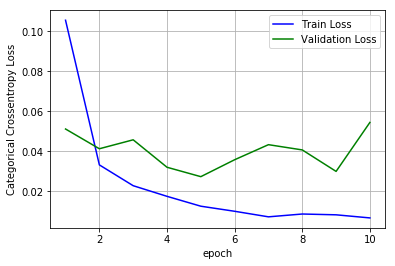

In [29]:
# Plotting the Loss Vs Epoch graph

fig, ax = plt.subplots(1,1)
x = list(range(1,n_epoch+1))
vy = history_cnnModel_1.history['val_loss']
ty = history_cnnModel_1.history['loss']
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x,ty,vy,ax)

#### 1.2)  3 layer structure with only Dropout

In [21]:
cnnModel_2 = Sequential()
cnnModel_2.add(Conv2D(10,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
cnnModel_2.add(MaxPooling2D())
cnnModel_2.add(Conv2D(10, (3,3), padding='same',activation='relu',kernel_initializer='he_normal'))
cnnModel_2.add(MaxPooling2D())
cnnModel_2.add(Dropout(0.5))
cnnModel_2.add(Conv2D(10, (3,3), padding='same', activation='relu', kernel_initializer='he_normal'))
cnnModel_2.add(MaxPooling2D())
cnnModel_2.add(Dropout(0.5))
cnnModel_2.add(Flatten())
cnnModel_2.add(Dense(256,activation='relu', kernel_initializer='he_normal'))
cnnModel_2.add(Dropout(0.5))
cnnModel_2.add(Dense(nclasses,activation='softmax'))

cnnModel_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_ccnnModel_2 = cnnModel_2.fit(X_Train, Y_Train, batch_size = batch_size , epochs = n_epoch, verbose = 1, validation_data = (X_Test,Y_Test) )
score_cnnModel_2 = cnnModel_2.evaluate(X_Test,Y_Test,verbose=1)
print("Accuracy : ", score_cnnModel_2[1])
print("Loss : ", score_cnnModel_2[0])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 33s 551us/step - loss: 1.8926 - acc: 0.3484 - val_loss: 0.7546 - val_acc: 0.8264
Epoch 2/10
60000/60000 [==============================] - 33s 548us/step - loss: 0.9820 - acc: 0.6665 - val_loss: 0.3974 - val_acc: 0.9170
Epoch 3/10
60000/60000 [==============================] - 33s 547us/step - loss: 0.7397 - acc: 0.7540 - val_loss: 0.2888 - val_acc: 0.9393
Epoch 4/10
60000/60000 [==============================] - 33s 548us/step - loss: 0.6287 - acc: 0.7950 - val_loss: 0.2467 - val_acc: 0.9460
Epoch 5/10
60000/60000 [==============================] - 33s 543us/step - loss: 0.5557 - acc: 0.8201 - val_loss: 0.2022 - val_acc: 0.9509
Epoch 6/10
60000/60000 [==============================] - 33s 545us/step - loss: 0.5148 - acc: 0.8354 - val_loss: 0.1786 - val_acc: 0.9572
E

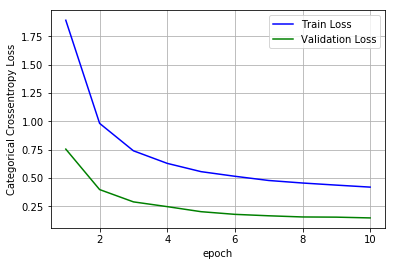

In [23]:
# Plotting the Loss Vs Epoch graph

fig, ax = plt.subplots(1,1)
x = list(range(1,n_epoch+1))
vy = history_ccnnModel_2.history['val_loss']
ty = history_ccnnModel_2.history['loss']
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x,ty,vy,ax)

#### 1.3) 3 layer structure with both BN and Dropout

In [26]:
cnnModel_3 = Sequential()
cnnModel_3.add(Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
cnnModel_3.add(MaxPooling2D())
cnnModel_3.add(Conv2D(32, (3,3), padding='same',activation='relu',kernel_initializer='he_normal'))
cnnModel_3.add(MaxPooling2D())
cnnModel_3.add(BatchNormalization())
cnnModel_3.add(Dropout(0.5))
cnnModel_3.add(Conv2D(32, (3,3), padding='same', activation='relu', kernel_initializer='he_normal'))
cnnModel_3.add(MaxPooling2D())
cnnModel_3.add(BatchNormalization())
cnnModel_3.add(Dropout(0.5))
cnnModel_3.add(Flatten())
cnnModel_3.add(Dense(256,activation='relu', kernel_initializer='he_normal'))
cnnModel_3.add(BatchNormalization())
cnnModel_3.add(Dropout(0.5))
cnnModel_3.add(Dense(nclasses,activation='softmax'))

cnnModel_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_cnnModel_3 = cnnModel_3.fit(X_Train, Y_Train, batch_size = batch_size , epochs = n_epoch, verbose = 1, validation_data = (X_Test,Y_Test) )
score_cnnModel_3 = cnnModel_3.evaluate(X_Test,Y_Test,verbose=1)
print("Accuracy : ", score_cnnModel_3[1])
print("Loss : ", score_cnnModel_3[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.7113 - acc: 0.7776 - val_loss: 0.1162 - val_acc: 0.9602
Epoch 2/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.2367 - acc: 0.9248 - val_loss: 0.0774 - val_acc: 0.9720
Epoch 3/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.1767 - acc: 0.9442 - val_loss: 0.0580 - val_acc: 0.9804
Epoch 4/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1450 - acc: 0.9561 - val_loss: 0.0463 - val_acc: 0.9844
Epoch 5/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1238 - acc: 0.9615 - val_loss: 0.0481 - val_acc: 0.9831
Epoch 6/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.1143 - acc: 0.9647 - val_loss: 0.0352 - val_acc: 0.9874
Epoch 7/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1012 - acc: 0.9676 - val_loss: 0.0345 - val_acc

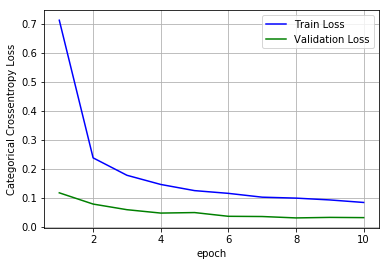

In [27]:
# Plotting the Loss Vs Epoch graph

fig, ax = plt.subplots(1,1)
x = list(range(1,n_epoch+1))
vy = history_cnnModel_3.history['val_loss']
ty = history_cnnModel_3.history['loss']
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x,ty,vy,ax)

In [11]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Model Structure","Accuracy", "Validation Loss"]

x.add_row(["Model 1 with BN and 64 Kernels", 0.9858, 0.0545])
x.add_row(["Model 2 with Dropout and 10 Kernels ", 0.9612, 0.1471])
x.add_row(["Model 3 With Dropout,BN and 32 Kernels ", 0.9901, 0.0306])
print(x)

+-----------------------------------------+----------+-----------------+
|             Model Structure             | Accuracy | Validation Loss |
+-----------------------------------------+----------+-----------------+
|      Model 1 with BN and 64 Kernels     |  0.9858  |      0.0545     |
|   Model 2 with Dropout and 10 Kernels   |  0.9612  |      0.1471     |
| Model 3 With Dropout,BN and 32 Kernels  |  0.9901  |      0.0306     |
+-----------------------------------------+----------+-----------------+


### Model 2 : Kernel Size = 5x5

In [33]:
cnnModel2_1 = Sequential()
cnnModel2_1.add(Conv2D(32,kernel_size=(5,5),strides=(1,1),padding='valid',activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
cnnModel2_1.add(MaxPooling2D())
cnnModel2_1.add(Conv2D(64, (5,5), padding='valid',activation='relu',kernel_initializer='he_normal'))
cnnModel2_1.add(BatchNormalization())
cnnModel2_1.add(Dropout(0.25))
cnnModel2_1.add(Flatten())
cnnModel2_1.add(Dense(256,activation='relu', kernel_initializer='he_normal'))
cnnModel2_1.add(BatchNormalization())
cnnModel2_1.add(Dropout(0.25))
cnnModel2_1.add(Dense(nclasses,activation='softmax'))

cnnModel2_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_cnnModel2_1 = cnnModel2_1.fit(X_Train, Y_Train, batch_size = batch_size , epochs = n_epoch, verbose = 1, validation_data = (X_Test,Y_Test) )
score_cnnModel2_1 = cnnModel2_1.evaluate(X_Test,Y_Test,verbose=1)
print("Accuracy : ", score_cnnModel2_1[1])
print("Loss : ", score_cnnModel2_1[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 91s 2ms/step - loss: 0.1209 - acc: 0.9627 - val_loss: 0.0438 - val_acc: 0.9856
Epoch 2/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0427 - acc: 0.9870 - val_loss: 0.0294 - val_acc: 0.9905
Epoch 3/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0276 - acc: 0.9911 - val_loss: 0.0343 - val_acc: 0.9885
Epoch 4/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0233 - acc: 0.9924 - val_loss: 0.0261 - val_acc: 0.9914
Epoch 5/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0163 - acc: 0.9951 - val_loss: 0.0381 - val_acc: 0.9874
Epoch 6/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0157 - acc: 0.9950 - val_loss: 0.0295 - val_acc: 0.9910
Epoch 7/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0136 - acc: 0.9956 - val_loss: 0.0314 - val_acc

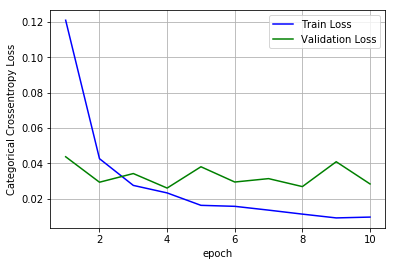

In [35]:
# Plotting the Loss Vs Epoch graph

fig, ax = plt.subplots(1,1)
x = list(range(1,n_epoch+1))
vy = history_cnnModel2_1.history['val_loss']
ty = history_cnnModel2_1.history['loss']
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x,ty,vy,ax)

In [38]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Accuracy", "Validation Loss"]

x.add_row([ 0.9913, 0.0283])

print(x)

+----------+-----------------+
| Accuracy | Validation Loss |
+----------+-----------------+
|  0.9913  |      0.0283     |
+----------+-----------------+


### Model 3 : Kernel Size : 7x7

In [6]:
cnnModel3_1 = Sequential()
cnnModel3_1.add(Conv2D(32,kernel_size=(7,7),strides=(1,1),padding='valid',activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
cnnModel3_1.add(Conv2D(32, (7,7), padding='valid',activation='relu',kernel_initializer='he_normal'))
cnnModel3_1.add(BatchNormalization())
cnnModel3_1.add(Dropout(0.25))
cnnModel3_1.add(Conv2D(64, (7,7), padding='same', activation='relu', kernel_initializer='he_normal'))
cnnModel3_1.add(BatchNormalization())
cnnModel3_1.add(Dropout(0.25))
cnnModel3_1.add(Conv2D(64, (7,7), padding='same',activation='relu',kernel_initializer='he_normal'))
cnnModel3_1.add(BatchNormalization())
cnnModel3_1.add(Dropout(0.5))
cnnModel3_1.add(MaxPooling2D())
cnnModel3_1.add(Conv2D(32, (7,7), padding='same', activation='relu', kernel_initializer='he_normal'))
cnnModel3_1.add(BatchNormalization())
cnnModel3_1.add(Dropout(0.5))
cnnModel3_1.add(Flatten())
cnnModel3_1.add(Dense(512,activation='relu', kernel_initializer='he_normal'))
cnnModel3_1.add(BatchNormalization())
cnnModel3_1.add(Dropout(0.5))
cnnModel3_1.add(Dense(nclasses,activation='softmax'))

cnnModel3_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_cnnModel3_1 = cnnModel3_1.fit(X_Train, Y_Train, batch_size = batch_size , epochs = n_epoch, verbose = 1, validation_data = (X_Test,Y_Test) )
score_cnnModel3_1 = cnnModel3_1.evaluate(X_Test,Y_Test,verbose=1)
print("Accuracy : ", score_cnnModel3_1[1])
print("Loss : ", score_cnnModel3_1[0])












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1223s 20ms/step - loss: 0.2323 - acc: 0.9314 - val_loss: 0.3182 - val_acc: 0.8852
Epoch 2/10
60000/60000 [==============================] - 1221s 20ms/step - loss: 0.0659 - acc: 0.9798 - val_loss: 0.1310 - val_acc: 0.9573
Epoch 3/10
60000/60000 [==============================] - 1218s 20ms/step - loss: 0.0467 - acc: 0.9862 - val_loss: 0.0648 - val_acc: 0.9796
Epoch 4/10
60000/60000 [==============================] - 1213s 20ms/step - loss: 0.0377 - acc: 0.9882 - val_loss: 0.0534 - val_acc: 0.9819
Epoch 5/10
60000/60000 [==============================] - 1226s 20ms/step - loss: 0.0336 - acc: 0.9897 - val_loss: 0.0325 - val_acc: 0.9899
Epoch 6/10
60000/60000 [

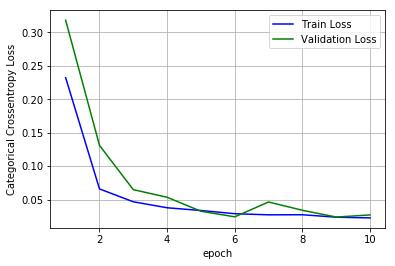

In [9]:
# Plotting the Loss Vs Epoch graph

fig, ax = plt.subplots(1,1)
x = list(range(1,n_epoch+1))
vy = history_cnnModel3_1.history['val_loss']
ty = history_cnnModel3_1.history['loss']
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x,ty,vy,ax)

In [10]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Accuracy", "Validation Loss"]

x.add_row([ 0.9917, 0.0270])

print(x)

+----------+-----------------+
| Accuracy | Validation Loss |
+----------+-----------------+
|  0.9917  |      0.027      |
+----------+-----------------+


### SUMMARY OF ALL THE MODELS :

### MODEL 1 : 
**A**) This model has 3 convulational layers with **64 kernels of size 3x3** in each of these. They also have **padding as 'same'** so that the size of output is same as that of the input. Every convulational layer is followed by a **maxpool layer** with default **kernel size of 2x2**. We get a maximum validational **accuracy of 98.58%** with **loss of 0.054**. This model has only **BatchNormalization** performed on it.

**B**) This model has 3 convulational layers with **10 kernels of size 3x3** in each of these. They also have **padding as 'same'** so that the size of output is same as that of the input. Every convulational layer is followed by a maxpool layer with default kernel size of 2x2. We get a maximum validational **accuracy of 96.12%** with **loss of 0.147**. This model has only **Dropout** performed on it with dropout **rate of 0.5**.

**C**) This model has 3 convulational layers with **32 kernels of size 3x3** in each of these. They also have **padding as 'same'** so that the size of output is same as that of the input. Every convulational layer is followed by a maxpool layer with default kernel size of 2x2. We get a maximum validational **accuracy of 99.01%** with **loss of 0.030**. This model has **both** BatchNormalization and Dropout performed on it with dropout rate of 0.5.


### MODEL 2 : 
This model has **2** convulational layer with **padding as 'valid'** in both of them. Because of this type of padding the ouput is of size (n-k+1)x(n-k+1). The **first layer** has **32 kernels of size 5x5**. The **second layer** has **64 kernels of size 5x5**. The first layer is also followed by a **Maxpool layer of kernel size 2x2**. Therefore the **output at the end of first layer is of size 12x12x32**. The **output at the end of the second layer is of size 8x8x64**. This is then passed through Flatten and Dense layer having **256 relu activations** to give a validational **accuracy of 99.13% and loss of 0.0283**. We are performing **both** BN and Dropout (rate = 0.25).

### MODEL 3 :
This model has 5 convulational layers as follows: 

**L1** : It has **32** kernels of **size 7x7** and **padding as 'valid'**. The **output size is 22x22x32**.

**L2** : It has **32** kernels of size **7x7** and padding as **'valid'**. The ouput size is **15x15x32**.

**L3** : It has **64** kernels of size **7x7** and padding as **'same'**. The ouput size is **15x15x64**.

**L4** : It has **64** kernels of size **7x7** and padding as **'same'**. The ouput size is **15x15x64**.

**After layer 4** we have a **Maxpool** layer of kernel size **2x2**. The ouput size is **7x7x64**.

**L5** : It has **32** kernels of size **7x7** and padding as **'same'**. The ouput size is **7x7x32**.

This is then passed through Flatten and Dense layer having **512 relu activations** to give a validational **accuracy of 99.17% and loss of 0.027**. We are performing **both** BN and Dropout (rate = 0.25 at some layer and rate = 0.5 at the rest of the layers).


